# E-Commerce Shipping Data Analysis

# Table of Contents

- <a href='#1'>1: Introduction </a>
    - <a href='#1.1'>1.1: Industry Review </a>
	- <a href='#1.2'>1.2: Context </a>
- <a href='#2'>2: Data set and Domain </a>
    - <a href='#2.1'>2.1: Data Dictionary </a>
    - <a href='#2.2'>2.2: Importing some depending libraries </a>
	- <a href='#2.3'>2.3: Reading Data </a>	
- <a href='#3'>3: Basic Exploration and Pre-Processing Data Analysis</a>
    - <a href='#3.1'>3.1: Variable categorization (count of numeric and categorical)</a>
    - <a href='#3.2'>3.2: Pre-Processing Data Analysis (count of missing/ null values etc.)</a>
    - <a href='#3.3'>3.3: Basic Findings</a>
- <a href='#4'>4: Exploratory Data Analysis (EDA)</a>
    - <a href='#4.1'>4.1: Univariate Exploration</a>
		- <a href='#4.1.1'>4.1.1: Unique Values</a>
		- <a href='#4.1.2'>4.1.2: Plotting Counts of Categorical Features</a>
		- <a href='#4.1.3'>4.1.3: Plotting Distributions of Numerical Features</a>
		- <a href='#4.1.4'>4.1.4: Univariate Findings</a>
	- <a href='#4.2.1'>4.2.1: Bivariate Exploration</a>
		- <a href='#4.2.2'>4.2.2: Bivariate Findings</a>
	- <a href='#4.3.1'>4.3.1: Multivariate Exploration</a>
    - <a href='#4.3.2'>4.3.2: Multivariate Findings</a>
- <a href='#5'>5: Feature Engineering </a>
- <a href='#6'>6: Splitting Data- Train and Test </a>
- <a href='#7'>7: Model - Logistic Regression </a>
- <a href='#8'>8: Predictions using Boosting algorithms </a>
	- <a href='#8.1'>8.1: Gradient Boosting </a>
	- <a href='#8.2'>8.2: Adaptive Boosting </a>
	- <a href='#8.3'>8.3: Extreme Gradient Boosting </a>
- <a href='#9'>9: Outcome </a>


<a id='1'></a>
## 1 Introduction

<a id='1.1'></a>
## 1.1 Industry Review

- Industry Review – Current practices, Background Research


#### E-commerce is the activity of electronically buying or selling of products on online services or over the Internet. E-commerce draws on technologies such as mobile commerce, electronic funds transfer, supply chain management, Internet marketing, online transaction processing, electronic data interchange, inventory management systems, and automated data collection systems. E-commerce is in turn driven by the technological advances of the semiconductor industry, and is the largest sector of the electronics industry.

<a id='1.2'></a>
## 1.2 Context

### An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.

<a id='2'></a>
## 2. Data set and Domain


- Imports and Loading Data
    - Data Dictionary
    - Importing Libraries
    - Reading the data


<a id='2.1'></a>
## 2.1 Data Dictionary

The data contains the following information:
- ID: ID Number of Customers.
- Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
- Mode of shipment: The Company Ships the products in multiple way such as Ship, Flight and Road.
- Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
- Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
- Cost of the product: Cost of the Product in US Dollars.
- Prior purchases: The Number of Prior Purchase.
- Product importance: The company has categorized the product in the various parameter such as low, medium, high.
- Gender: Male and Female.
- Discount offered: Discount offered on that specific product.
- Weight in grams: It is the weight in grams.
- Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.


<a id='2.2'></a>
## 2.2 Importing some depending libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt


<a id='2.3'></a>
## 2.3 Reading Data

In [2]:
df = pd.read_csv('E_Commerce.csv',index_col='ID')

In [3]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,D,Flight,4,2,177,3,low,F,44,1233,1
2,F,Flight,4,5,216,2,low,M,59,3088,1
3,A,Flight,2,2,183,4,low,M,48,3374,1
4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,C,Flight,2,2,184,3,medium,F,46,2484,1


<a id='3'></a>
## 3 Basic Exploration and Pre-Processing Data Analysis

<a id='3.1'></a>
### 3.1 Variable categorization (count of numeric and categorical )

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10999 entries, 1 to 10999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 1.0+ MB


In [5]:
df.shape

(10999, 11)

<a id='3.2'></a>
### 3.2 Pre-Processing Data Analysis (count of missing/ null values, redundant columns, etc.)

In [6]:
df.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [7]:
df['Reached.on.Time_Y.N'].value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

In [8]:
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [9]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,D,Flight,4,2,177,3,low,F,44,1233,1
2,F,Flight,4,5,216,2,low,M,59,3088,1
3,A,Flight,2,2,183,4,low,M,48,3374,1
4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,C,Flight,2,2,184,3,medium,F,46,2484,1


<a id='3.3'></a>
### 3.3 Basic Findings 


- 10,999 rows X 11 columns
- No null columns


- Distribution of Features   
    - **Categorical**
        - Warehouse block: The company has a big warehouse, which is divided in to blocks
        - Mode of shipment: The company ships the products in multiple ways
        - Product importance: Company assigns priority levels to each shipment
        - Gender: Male and Female
        - Reached on time: Target variable where the package either arrived on time or not
            - 0: Arrived on time
            - 1: Did not arrive on time   
                - 59% of orders did not arrive on time
                - Meaning about only 41% of orders arrived on time
    - **Numerical**

        - Customer care calls: The number of calls made by the customer to get shipping updates
            - Average customer calls about 4 times
            - Min # of calls is 2
            - Max # of calls is 7
        - Customer rating: The rating the customer gave the company (1-5)
            - Average rating is 2.99 on a scale of 1-5
        - Cost of the product: Cost of product in USD
            - Average product cost is \\$210
            - Min price is \\$96
            - Max price is \\$310
        - Prior purchases: Number of prior purchases by customer
            - Average is 3.5
            - Min is 2
            - Max is 10
        - Discount offered: Discount offered on specific product
            - Average discount is 13%
            - Min discount is 1% (I assume this is equal to 0)
            - Max discount is 65%
        - Weight in gms: Weight of the package in grams
            - Average product weight is about 3634 grams (about 8 pounds)
            - Min weight is 1001 grams (about 2.2 pounds)
            - Max weight is 7846 grams (a little over 17 pounds)

<a id='4'></a>
# 4. Exploratory Data Analysis (EDA)

<a id='4.1'></a>
## 4.1 Univariate Exploration

<a id='4.1.1'></a>
## 4.1.1 Unique Values

In [10]:
print(f'Number of Unique Values in Each Column:\n{df.nunique()}')

Number of Unique Values in Each Column:
Warehouse_block           5
Mode_of_Shipment          3
Customer_care_calls       6
Customer_rating           5
Cost_of_the_Product     215
Prior_purchases           8
Product_importance        3
Gender                    2
Discount_offered         65
Weight_in_gms          4034
Reached.on.Time_Y.N       2
dtype: int64


In [11]:
# I am interested in finding out what the different values of some columns are

df.Warehouse_block.unique()

array(['D', 'F', 'A', 'B', 'C'], dtype=object)

In [12]:
df.Mode_of_Shipment.unique()

array(['Flight', 'Ship', 'Road'], dtype=object)

In [13]:
df.Product_importance.unique()

array(['low', 'medium', 'high'], dtype=object)

<a id='4.1.2'></a>
## 4.1.2 Plotting Count of Categorical Features

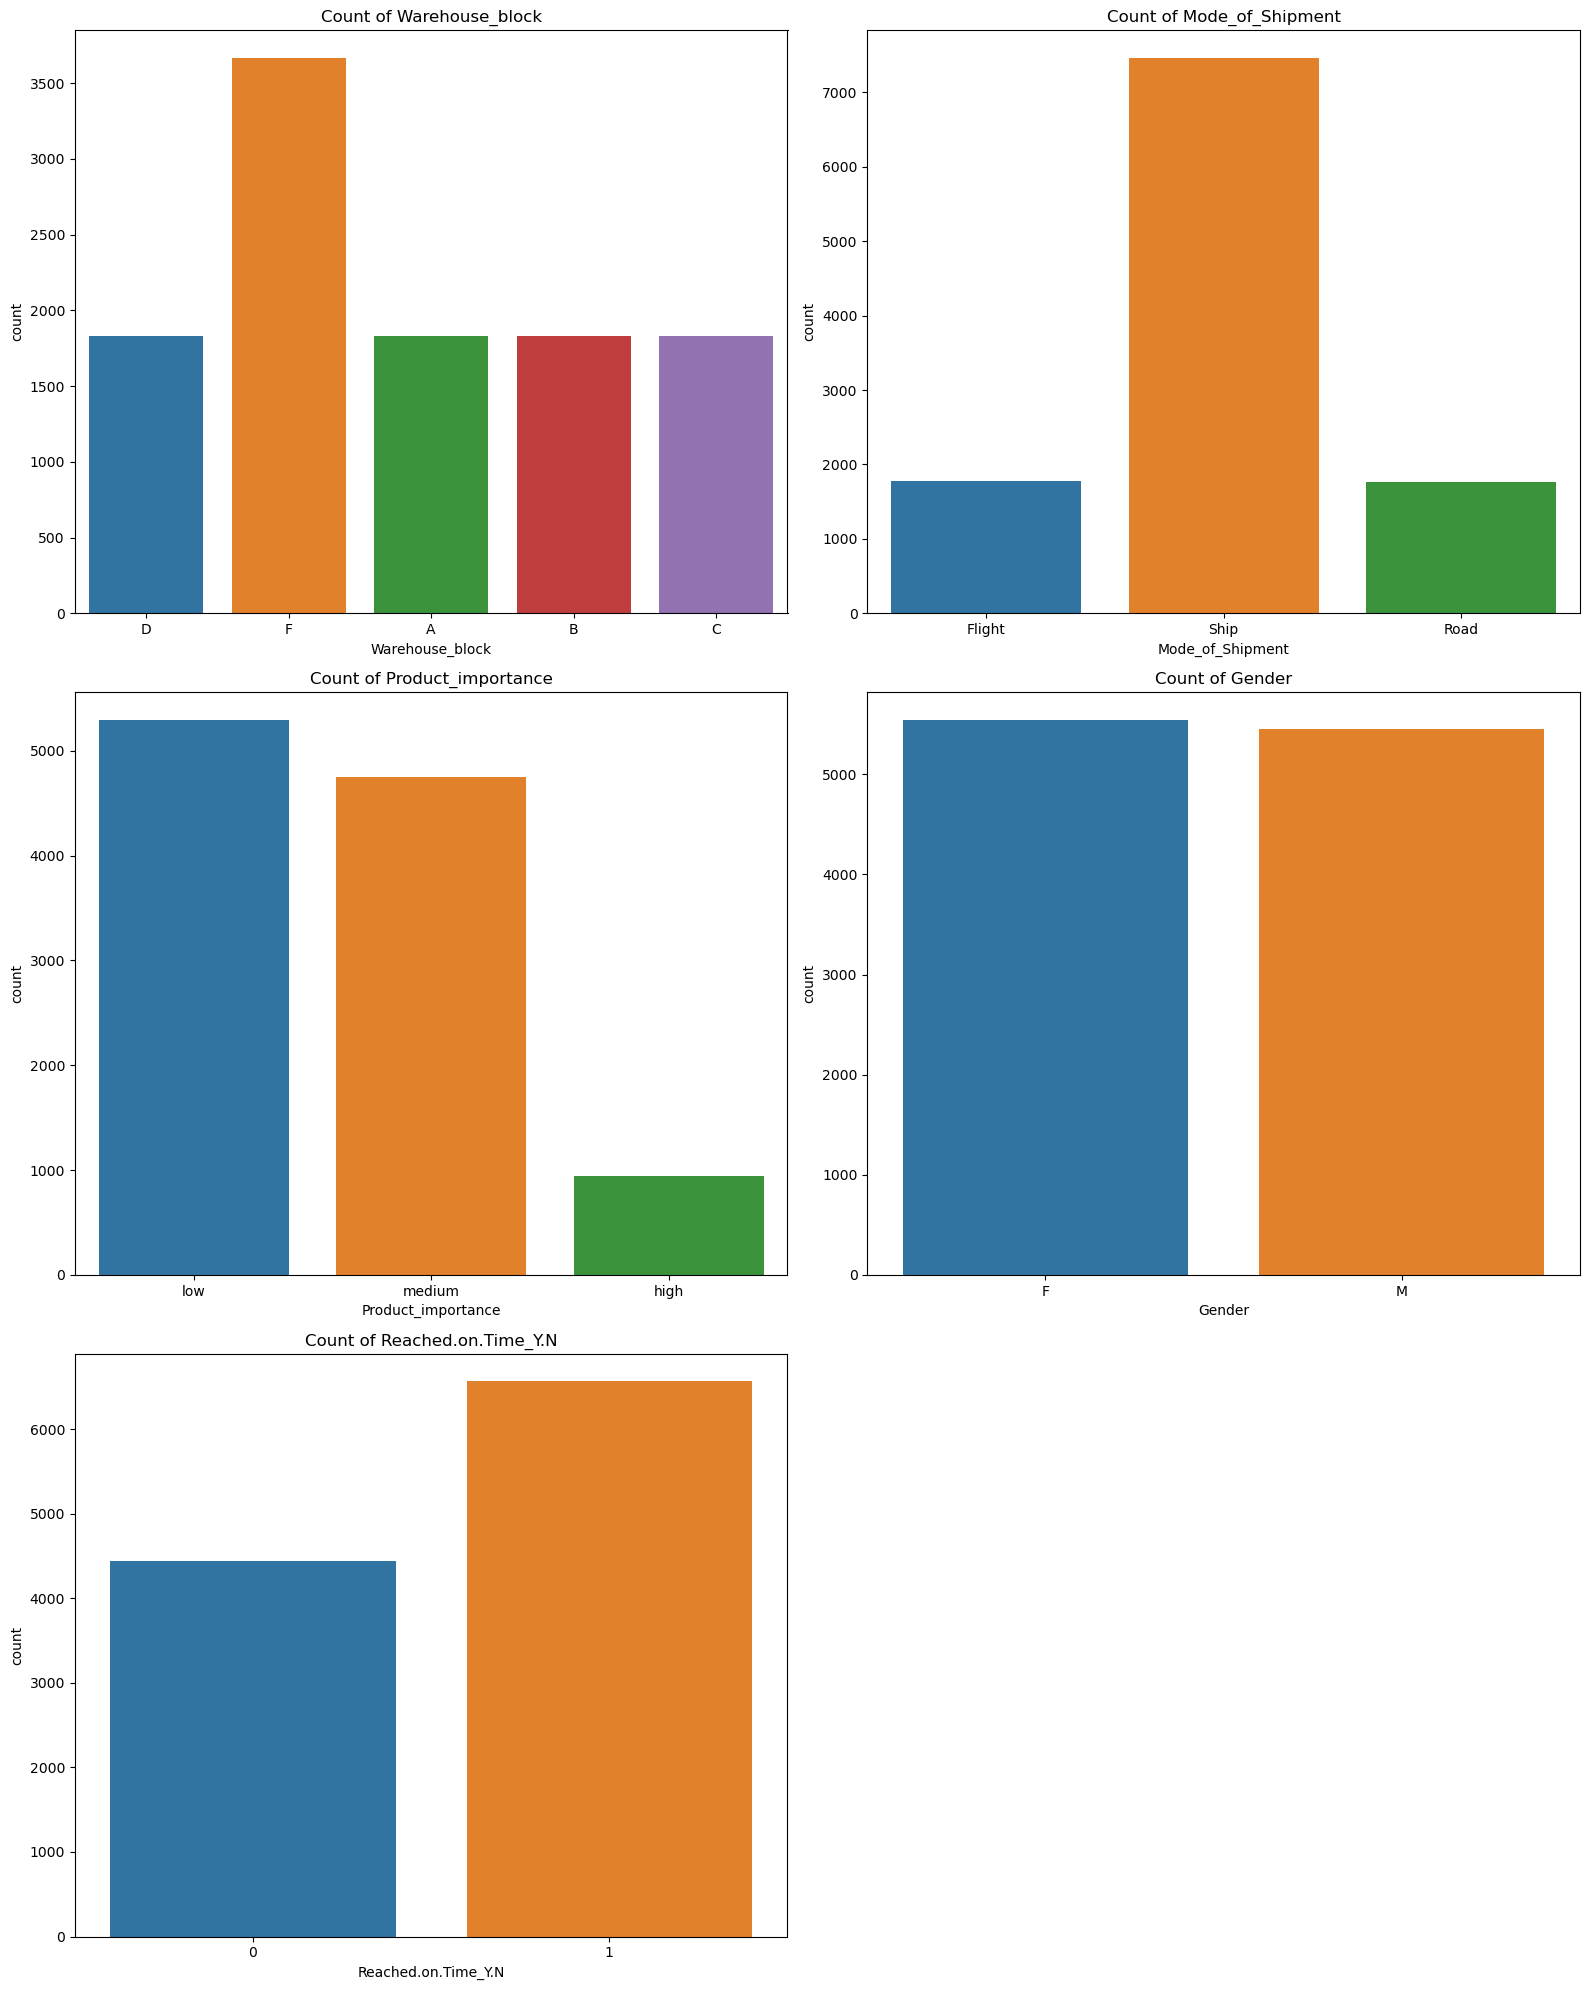

In [14]:
cat_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender',
        'Reached.on.Time_Y.N']

plt.figure(figsize = (16, 20))
plotnumber = 1


for i in range(len(cat_cols)):
        ax = plt.subplot(3, 2, plotnumber)
        sns.countplot(x = cat_cols[i], data = df, ax = ax)
        plt.title(f'Count of {cat_cols[i]}')
        
        plotnumber += 1

plt.tight_layout()
plt.show()

<a id='4.1.3'></a>
## 4.1.3 Plotting Distributions of Numerical Features


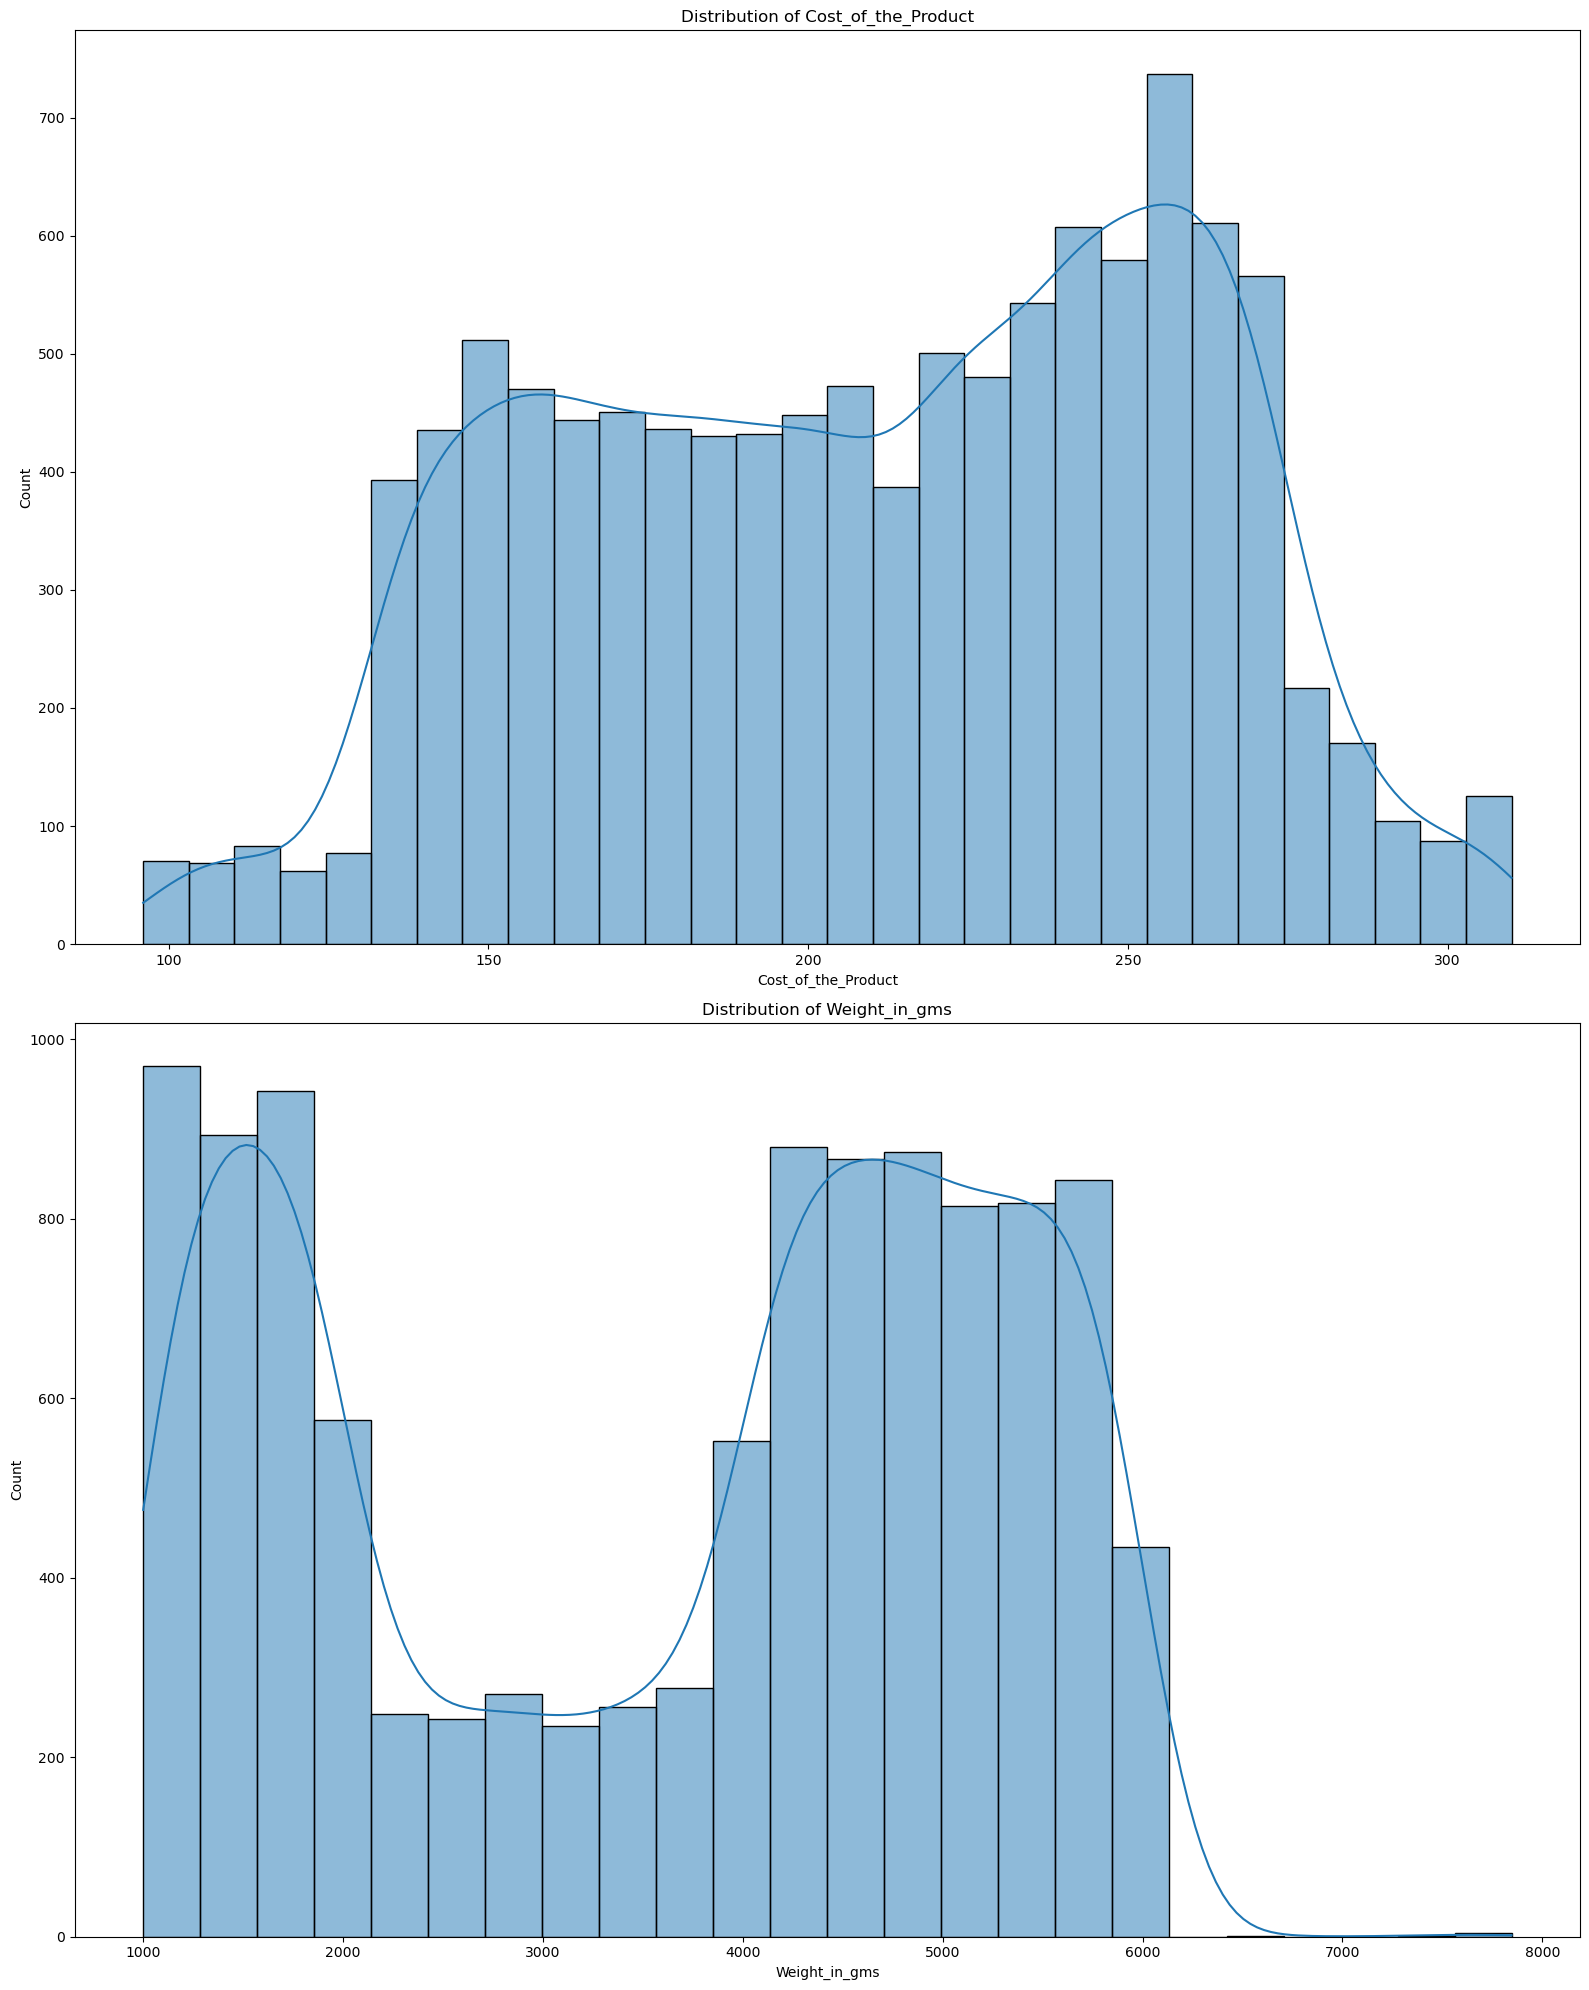

In [15]:
cont_cols = ['Cost_of_the_Product', 'Weight_in_gms']

plt.figure(figsize = (16, 20))
plotnumber = 1


for i in range(len(cont_cols)):
        ax = plt.subplot(2, 1, plotnumber)
        sns.histplot(x = cont_cols[i], data = df, ax = ax,kde=True)
        plt.title(f'Distribution of {cont_cols[i]}')
        
        plotnumber += 1

plt.tight_layout()
plt.show()

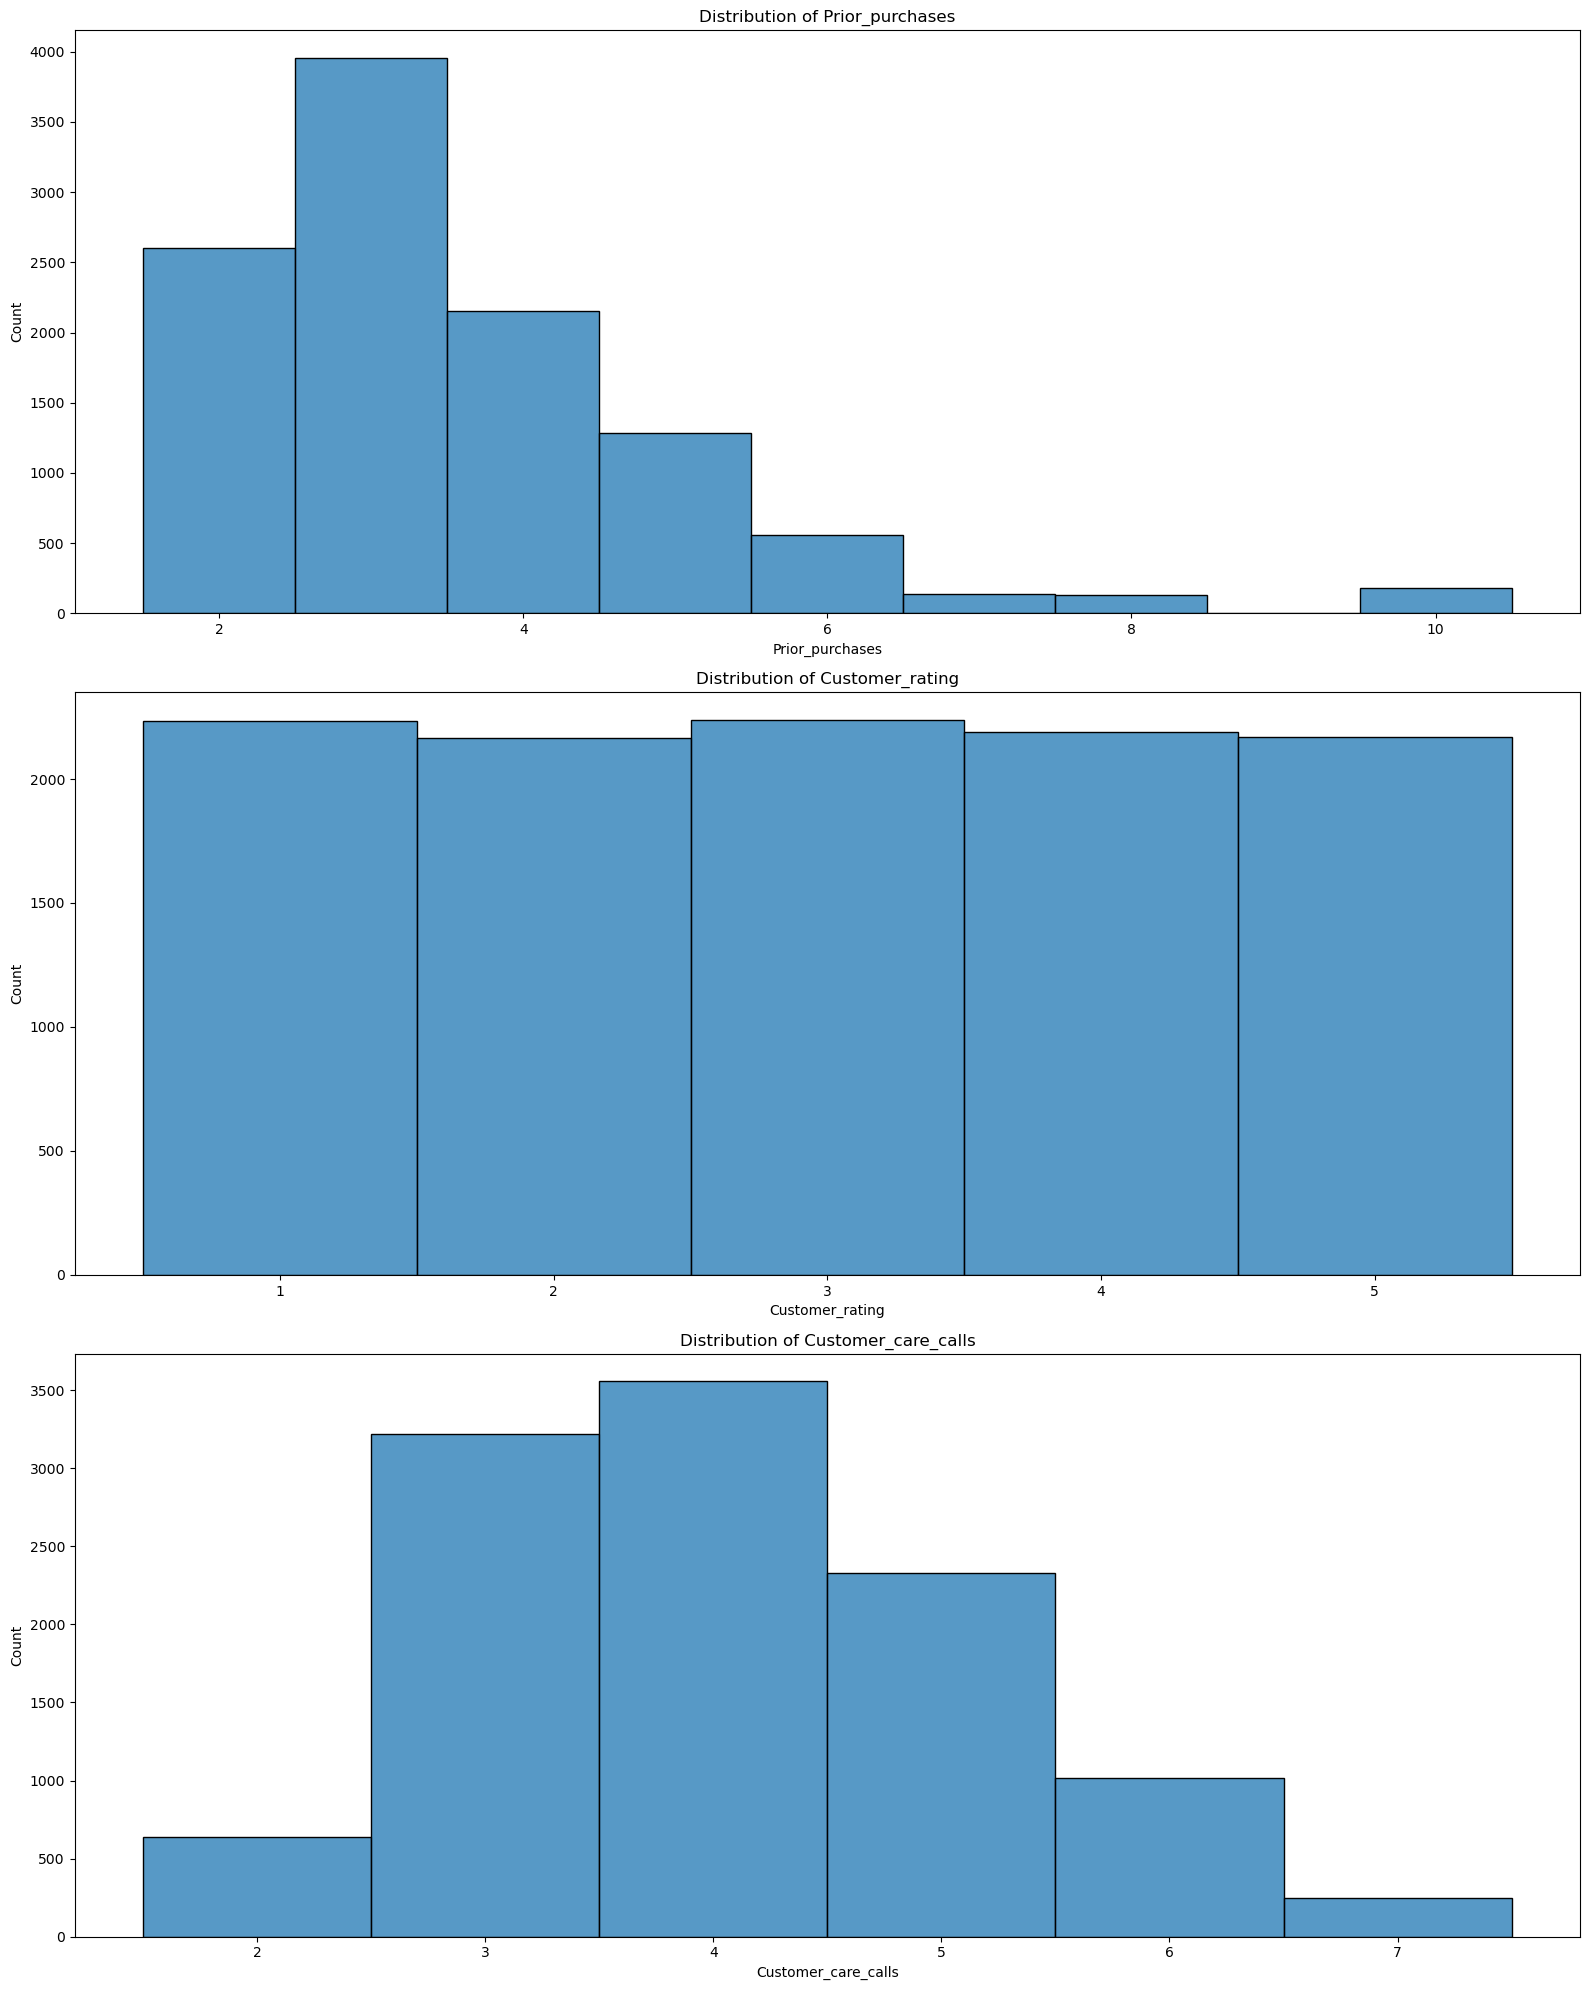

In [16]:
dis_cols = ['Prior_purchases', 'Customer_rating', 'Customer_care_calls']

plt.figure(figsize = (16, 20))
plotnumber = 1


for i in range(len(dis_cols)):
        ax = plt.subplot(3, 1, plotnumber)
        sns.histplot(x = dis_cols[i], data = df, ax = ax, discrete=True)
        plt.title(f'Distribution of {dis_cols[i]}')
        
        plotnumber += 1

plt.tight_layout()
plt.show()

<a id='4.1.4'></a>
## 4.1.4 Univariate Findings

- Warehouse block is broken down into 5 categories: A, B, C, D, F
- shipping method has 3 categories: plane, ship, or road
- There are 3 product priority levels: low, medium, high
- Warehouse block F has the most orders with just over 3,500. The other 4 all have just under 2,000 orders
- Ship is by far the most common transportation method with 
- Most customers call about the status of their order 3-4 times, but 5 calls is not far behind
- As stated before, the average rating is just under 3 on a 1-5 scale. This is because the distribution of ratings is extremely equal
- Most customers have 3 previous orders, but it is not uncommon for a customer to have between 2-5 prior purchases
- About 48% of the orders are of low priority and the rest is made up of 43% medium priorty and the other ~9% is high priority
- The dataset represents almost a perfect split of orders by Males and Females, with there being slightly more orders by Females
- About 60% of orders are NOT delivered on time, and the other 40% are delivered as estimated
- Most orders cost between \\$150-\\$250
- Almost all discounts are 10% or less with the highest discount at almost 65%, but it is very uncommon
- The heaviest order is just under 8,000g. The distribution of package weights is bimodal, with peaks between 1,000g - 2,000g and a peak at 4,000g - 6,000g


<a id='4.2.1'></a>
## 4.2.1 Bivariate Exploration


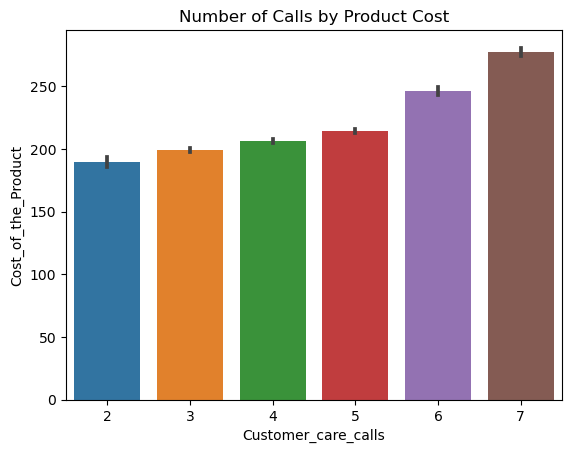

In [17]:
plt.title('Number of Calls by Product Cost')
g = sns.barplot(x='Customer_care_calls',y='Cost_of_the_Product', data=df)

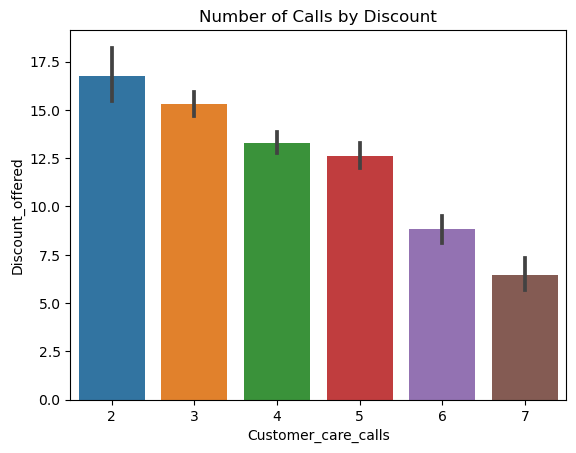

In [18]:
plt.title('Number of Calls by Discount')
g = sns.barplot(x='Customer_care_calls',y='Discount_offered', data=df)

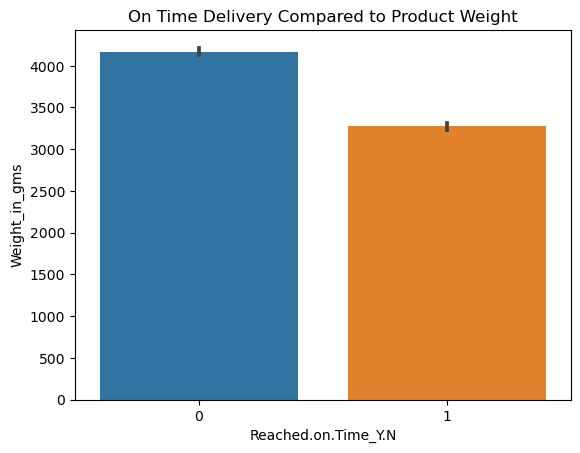

In [19]:
plt.title('On Time Delivery Compared to Product Weight')
g = sns.barplot(x='Reached.on.Time_Y.N',y='Weight_in_gms', data=df)

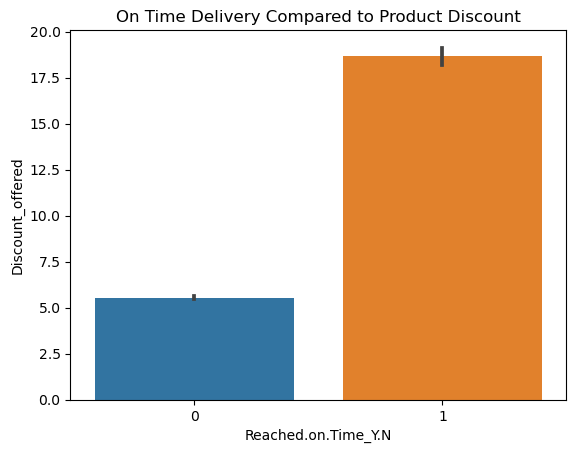

In [20]:
plt.title('On Time Delivery Compared to Product Discount')
g = sns.barplot(x='Reached.on.Time_Y.N',y='Discount_offered', data=df)

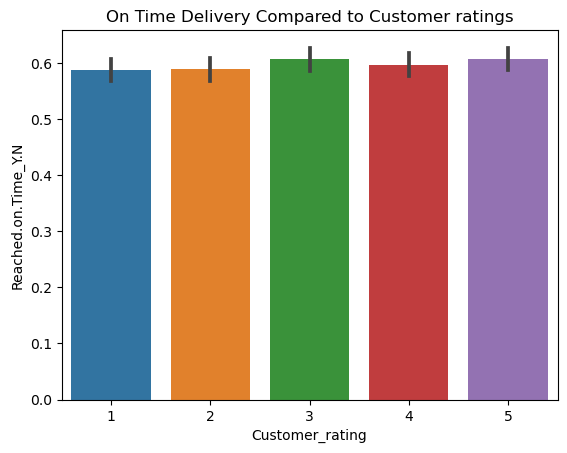

In [21]:
plt.title('On Time Delivery Compared to Customer ratings')
g = sns.barplot(x='Customer_rating',y='Reached.on.Time_Y.N', data=df)

<Axes: xlabel='Customer_care_calls'>

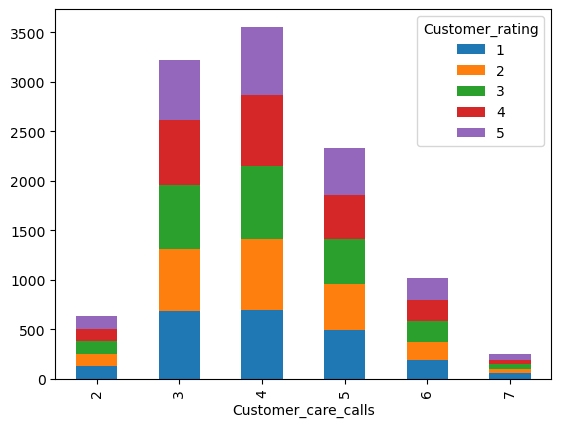

In [22]:
# Customers calls and their ratings
pd.crosstab(df['Customer_care_calls'], df['Customer_rating']).plot(kind='bar', stacked=True)

<Axes: xlabel='Customer_care_calls'>

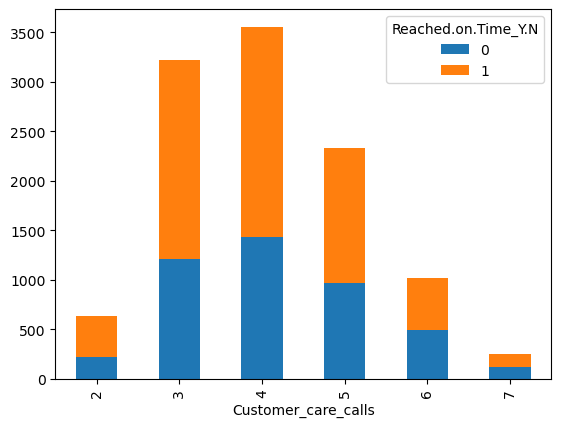

In [23]:
# Customers calls queries and product reach in time or not
pd.crosstab(df['Customer_care_calls'], df['Reached.on.Time_Y.N']).plot(kind='bar', stacked=True)

<Axes: xlabel='Customer_care_calls'>

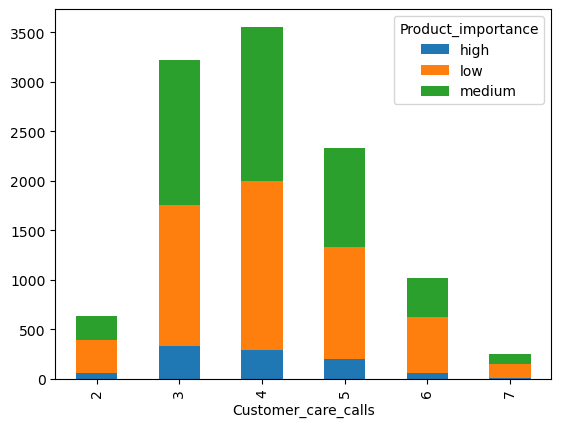

In [24]:
# Customers calls queries and product reach in time or not
pd.crosstab(df['Customer_care_calls'], df['Product_importance']).plot(kind='bar', stacked=True)

<a id='4.2.2'></a>
## 4.2.2 Bivariate Findings

- The relationship between the number of calls a customer makes and the cost of the product consistenltly increase as the cost rises
- On the other hand, the number of calls decreases as the discount % decreases. The higher the discount, the less likely a customer is to inquire about it
- Heavier products are more likely to arrive on time
- Higher discounted products are much less likely to arrive on time

<a id='4.3.1'></a>
## 4.3.1 Multivariate Exploration


C:\Users\SHIVANSH\AppData\Local\Temp\ipykernel_6424\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

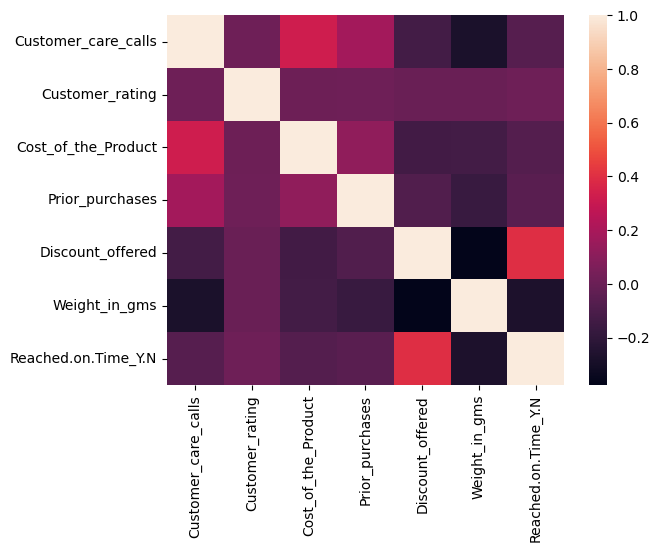

In [25]:
sns.heatmap(df.corr())

<a id='4.3.2'></a>
##  4.3.2 Multivariate Findings

- The product discount is the feature that most highly correlates to if a product is delivered on time

- Number of calls and product cost are also highly correlated 

<a id='5'></a>
## 5. Feature Engineering

In [26]:
df=df.drop_duplicates()

<a id='5.1'></a>
## 5.1 Outliers

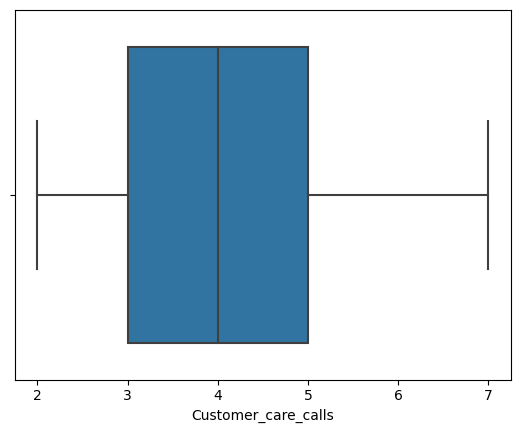

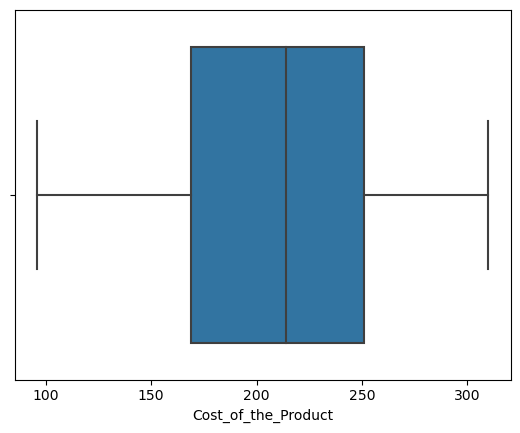

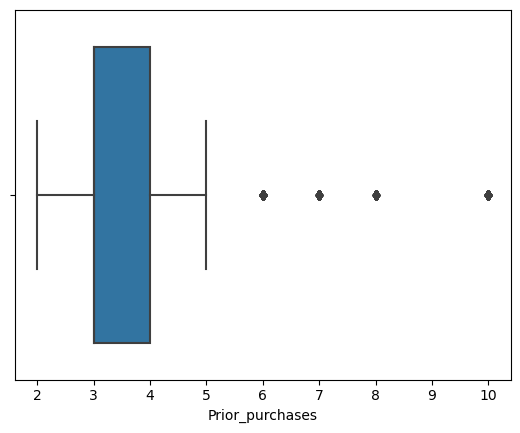

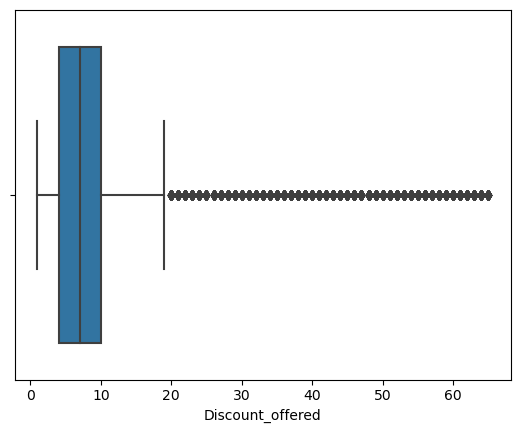

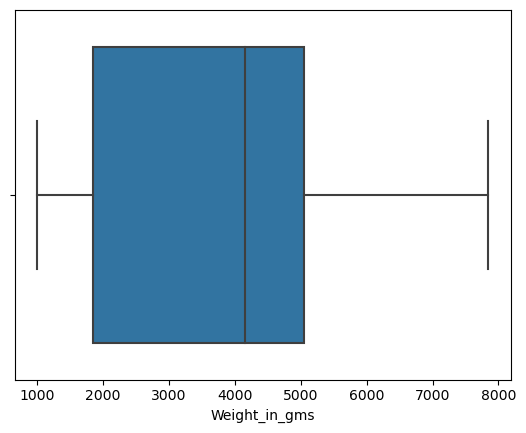

In [27]:
# outliers numerical variables
a=['Customer_care_calls',  'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

for i in a:
    sns.boxplot(x=i,data=df)
    plt.show()

In [28]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,D,Flight,4,2,177,3,low,F,44,1233,1
2,F,Flight,4,5,216,2,low,M,59,3088,1
3,A,Flight,2,2,183,4,low,M,48,3374,1
4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [29]:
x=df.drop("Reached.on.Time_Y.N",axis=1)
y=df['Reached.on.Time_Y.N']

In [30]:
x.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
ID,,,,,,,,,,
1,D,Flight,4,2,177,3,low,F,44,1233
2,F,Flight,4,5,216,2,low,M,59,3088
3,A,Flight,2,2,183,4,low,M,48,3374
4,B,Flight,3,3,176,4,medium,M,10,1177
5,C,Flight,2,2,184,3,medium,F,46,2484


In [31]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [32]:
from sklearn.compose import ColumnTransformer

In [33]:
encoder=ColumnTransformer([('one',OneHotEncoder(),[0,1,6,7]),('sc',StandardScaler(),[2,3,4,5,8,9])],remainder="passthrough")

In [34]:
X=encoder.fit_transform(x)

In [35]:
type(X)

numpy.ndarray

In [36]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.047711,-0.700755,-0.690722,-0.372735,1.889983,-1.468240
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.047711,1.421578,0.120746,-1.029424,2.815636,-0.333893
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.799887,-0.700755,-0.565881,0.283954,2.136824,-0.159002
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.923799,0.006689,-0.711529,0.283954,-0.208162,-1.502484
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-1.799887,-0.700755,-0.545074,-0.372735,2.013404,-0.703244


<a id='6'></a>
## 6. Splitting Data - Train and Test 

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,train_size=0.8)

In [39]:
xtrain.shape

(8799, 19)

In [40]:
ytrain.shape

(8799,)

<a id='7'></a>
## 7.  Model - Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
model=LogisticRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [43]:
ypred

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [44]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))

0.6472727272727272


In [45]:
from sklearn import metrics


In [46]:
print(metrics.confusion_matrix(ytest,ypred))

[[515 352]
 [424 909]]


<a id='8'></a>
## 8. Predictions using Boosting algorithms:-

<a id='8.1'></a>
## 8.1 Gradient Boosting (69.18% accuracy): 

* Gradient Boosting Classification works by combining multiple decision trees to create a strong predictive model. In each iteration, the algorithm creates a decision tree based on the errors made by the previous tree. The errors are calculated using a loss function, which measures the difference between the predicted and actual values.


* At the start of the algorithm, the model makes initial predictions for each data point. Then, it calculates the errors and uses them to create the first decision tree. The predictions from this tree are added to the initial predictions, and the errors are calculated again. The process is repeated, with each new tree correcting the errors made by the previous trees. The final prediction is the average of all the predictions made by the individual trees.


* Each decision tree is trained on some data and tries to predict its class label based on some features (such as age, gender, income, etc.). If it makes a wrong prediction, it gets some negative feedback (a gradient) that tells it how much and in which direction it needs to change its prediction (a descent). Then another decision tree is trained on the same data but with more weight given to the instances that were misclassified by the previous tree. This way, each new tree tries to correct the errors made by its predecessors until no more improvement can be made.


* The final output of gradient boost classification is a weighted combination of all the decision trees’ predictions. This output can be used as a probability score for each class label or as a binary decision based on some threshold2. Gradient boost classification can handle both binary and multiclass problems.

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import class_weight


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


class_weights = class_weight.compute_sample_weight('balanced', y_train)

gbc_model = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.01,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=None,
    subsample=1.0,
    random_state=42
)


gbc_model.fit(X_train, y_train, sample_weight=class_weights)


y_train_pred_gbc = gbc_model.predict(X_train)
y_test_pred_gbc = gbc_model.predict(X_test)

# Calculate the accuracy of the model on the training and testing sets
train_acc = accuracy_score(y_train, y_train_pred_gbc)
test_acc = accuracy_score(y_test, y_test_pred_gbc)

# Print the accuracy scores
print('Train accuracy: ', train_acc)
print('Test accuracy: ', test_acc)

Train accuracy:  0.6879190817138311
Test accuracy:  0.6918181818181818


In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_test_pred_gbc))

              precision    recall  f1-score   support

           0       0.57      0.97      0.72       895
           1       0.96      0.50      0.66      1305

    accuracy                           0.69      2200
   macro avg       0.77      0.74      0.69      2200
weighted avg       0.80      0.69      0.68      2200



<a id='8.2'></a>
## 8.2 Adaptive Boosting (64.7% accuracy):

* Adaboost (Adaptive Boosting)  works by combining multiple simple models, called weak classifiers, to create a strong predictive model.


* Adaboost starts by assigning equal weights to each training example. It then trains a weak classifier on a subset of the data and evaluates its accuracy. The algorithm then assigns higher weights to the training examples that were misclassified by the weak classifier.


* In the next iteration, Adaboost trains another weak classifier on a new subset of the data, but this time the training examples are weighted based on the errors made in the previous iteration. The process is repeated until a set number of weak classifiers have been trained.


* The final ensemble model is created by combining the weak classifiers using a weighted sum. The weight assigned to each weak classifier depends on its accuracy in the training data. The final prediction is made by taking a weighted majority vote of the predictions made by the individual classifiers


* The key idea behind Adaboost is to focus on the training examples that are hard to classify, and assign more weight to them in subsequent iterations. This allows the algorithm to give more attention to the examples that are more difficult to classify correctly, and ultimately improve the accuracy of the final model.

In [49]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=0.01,
    algorithm='SAMME.R',
    random_state=42
)

abc.fit(X_train, y_train, sample_weight=class_weights)

y_train_pred = abc.predict(X_train)
y_test_pred = abc.predict(X_test)

# Calculate the accuracy of the model on the training and testing sets
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Print the accuracy scores
print('Train accuracy: ', train_acc)
print('Test accuracy: ', test_acc)


Train accuracy:  0.6431412660529605
Test accuracy:  0.6472727272727272


In [50]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70       895
           1       1.00      0.41      0.58      1305

    accuracy                           0.65      2200
   macro avg       0.77      0.70      0.64      2200
weighted avg       0.81      0.65      0.63      2200



<a id='8.3'></a>
## 8.3 Extreme Gradient Boosting (69.1% accuracy):

* XGBoost (Extreme Gradient Boosting) is an advanced implementation of the gradient boosting algorithm, which is a popular machine learning technique used for both regression and classification problems. XGBoost is specifically designed to improve the efficiency and accuracy of gradient boosting algorithms.


* XGBoost classification works by creating an ensemble of decision trees that are trained sequentially on the data. Each decision tree in the ensemble is a weak learner, meaning that it has low accuracy on its own. However, by combining many weak learners, XGBoost creates a strong predictive model that is capable of accurately classifying the data.


* The key difference between XGBoost and other gradient boosting algorithms is the way that it optimizes the model during training. XGBoost uses a technique called gradient descent, which is a mathematical optimization method that minimizes the loss function of the model. This results in a more efficient and accurate model.


* Another important feature of XGBoost is its ability to handle missing values in the data. XGBoost has built-in support for handling missing values by assigning them a direction during the tree construction process, which can improve the accuracy of the model.


* XGBoost also has several hyperparameters that can be tuned to optimize the model. These include the number of trees in the ensemble, the maximum depth of each tree, the learning rate, and the regularization parameters.


* Thus, XGBoost classification is an advanced implementation of gradient boosting algorithms, which creates an ensemble of decision trees that are trained sequentially on the data. It uses gradient descent optimization method to improve the efficiency and accuracy of the model. XGBoost can handle missing values in the data and has several hyperparameters that can be tuned to optimize the model.

In [51]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [52]:

import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)


params = {
    'objective': 'binary:logistic',
    #'eval_metric': 'logloss',
    'eta': 0.01,
    'max_depth': 3,
    'subsample': 1.0,
    'colsample_bytree': 0.8,
    'seed': 42
}


num_rounds = 1000
xgb_model = xgb.train(params, dtrain, num_rounds)

y_train_pred_xgb = xgb_model.predict(dtrain)
y_test_pred_xgb = xgb_model.predict(dtest)

y_train_pred_xgb[y_train_pred_xgb >= 0.5] = 1
y_train_pred_xgb[y_train_pred_xgb < 0.5] = 0

y_test_pred_xgb[y_test_pred_xgb >= 0.5] = 1
y_test_pred_xgb[y_test_pred_xgb < 0.5] = 0

# Calculate the accuracy of the model on the training and testing sets
train_acc = accuracy_score(y_train, y_train_pred_xgb)
test_acc = accuracy_score(y_test, y_test_pred_xgb)

# Print the accuracy scores
print('Train accuracy: ', train_acc)
print('Test accuracy: ', test_acc)

Train accuracy:  0.7032617342879872
Test accuracy:  0.6918181818181818


In [53]:
print(classification_report(y_test,y_test_pred_xgb))

              precision    recall  f1-score   support

           0       0.58      0.91      0.71       895
           1       0.89      0.54      0.68      1305

    accuracy                           0.69      2200
   macro avg       0.74      0.73      0.69      2200
weighted avg       0.77      0.69      0.69      2200



<a id='9'></a>
## 9. Outcome

1.What was Customer Rating? And was the product delivered on time?



On different Customer ratin there is similar observation of reaching the product delivered on time.

2.Is Customer query is being answered if product importance is high, having highest customer rating or being delivered on time?

There are on a average 3-5 customer queries are answered whether product impotance is high or product delivered on the time.